# Time Series -- Episode 2  
1. Basic facts and statistics about the time series
2. Examine the trend and autocorrelation of the time series

- Blogs(https://teamyan.wordpress.com/)
- Codes (https://github.com/aayancheng/timeseries)

In [3]:
#loading the pandas and matplotlib libraries
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Note that the way the file is stored in your folders will affect the code below:
# we store the data file under a data sub-folder called "data_for_ts" 
# and this notebook is saved under "Timeseries"  folder.

df = pd.read_csv('../Timeseries/data_for_ts/weatherAUS.csv')

In [5]:
# look at the top 5 rows of the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# we will focus on the temperature data for Sydney
sydn = df[df['Location']=='Sydney']
sydn['Date'] = pd.to_datetime(sydn['Date'])
sydn.head()

<ipython-input-6-5477c7ac897f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sydn['Date'] = pd.to_datetime(sydn['Date'])


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## Let's deep dive into the time series of Sydney temperature
- Visualize the time series
- The overall mean and standard deviation of the last 9 years
- The mean of every single year
- Visualize the moving average of last 30 days (which reduces the variation)

In [7]:
# use the date column is the index of the time series
sydn.index = pd.DatetimeIndex(sydn['Date'])

<AxesSubplot:xlabel='Date'>

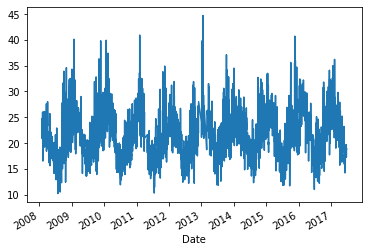

In [8]:
# Our first look on a time series which is the temperature at 3 p.m.
sydn['Temp3pm'].plot()

In [9]:
# average of temperature from 2008 to 2017
sydn['Temp3pm'].mean()

21.533473053892212

In [10]:
# average of temperature in every year from 2008 to 2017
sydn['Temp3pm'].resample('A').mean()

Date
2008-12-31    20.335821
2009-12-31    21.610959
2010-12-31    21.336011
2011-12-31    21.012239
2012-12-31    20.835821
2013-12-31    22.008309
2014-12-31    21.847671
2015-12-31    21.624658
2016-12-31    22.243989
2017-12-31    23.150000
Freq: A-DEC, Name: Temp3pm, dtype: float64

<AxesSubplot:xlabel='Date'>

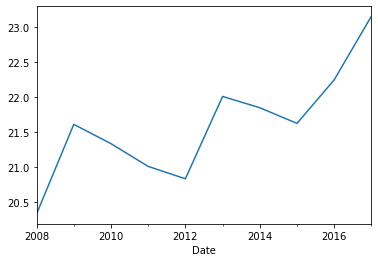

In [11]:
# Visualize the trend of annual average
sydn['Temp3pm'].resample('A').mean().plot()

<AxesSubplot:xlabel='Date'>

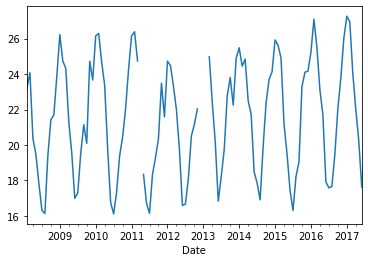

In [12]:
## Visualize the trend of monthly average
sydn['Temp3pm'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

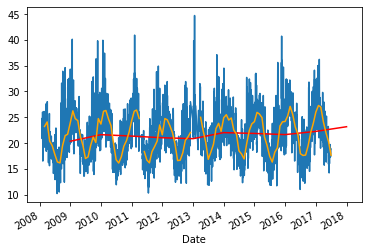

In [13]:
# ## Visualize the original, annual average, and monthly average
sydn['Temp3pm'].plot()
sydn['Temp3pm'].resample('A').mean().plot(color=['red'])
sydn['Temp3pm'].resample('M').mean().plot(color=['orange'])

From the above charts, while it has many variations from day to day, but the overall temperature is rising

<AxesSubplot:xlabel='Date'>

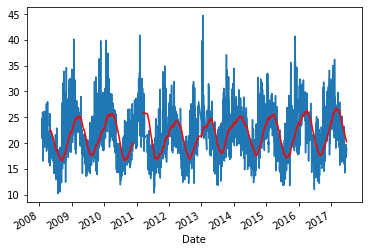

In [14]:
## Visualize the trend of rolling 90 days average
sydn['Temp3pm'].plot()
sydn['Temp3pm'].rolling(90).mean().plot(color=['red'])

### What is the variation (formally standard deviation) of the temp?

In [15]:
sydn['Temp3pm'].std()

4.301543414288172

In [16]:
sydn['Temp3pm'].resample('A').std()

Date
2008-12-31    3.995847
2009-12-31    4.283041
2010-12-31    4.317262
2011-12-31    4.618830
2012-12-31    3.842798
2013-12-31    4.280589
2014-12-31    3.952913
2015-12-31    4.526163
2016-12-31    4.373382
2017-12-31    4.283857
Freq: A-DEC, Name: Temp3pm, dtype: float64

#### The vairation is around 4 degree a year. Not a bad place to live :) 

### In general, the temperature of one time point is related to temperature of another time point (near by, or far apart around the same season: Spring, Summer, Autumn, Winter). This type of relation is called autocorrelation. 

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

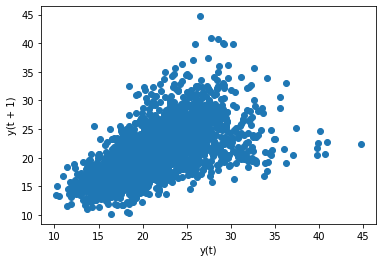

In [17]:
# plotting the values of today tmerpature against the next day's temperature (lag = 1)
# a complete even spread of the dots represents no relationship between them, so no autocorrelation
pd.plotting.lag_plot(sydn['Temp3pm'], lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 90)'>

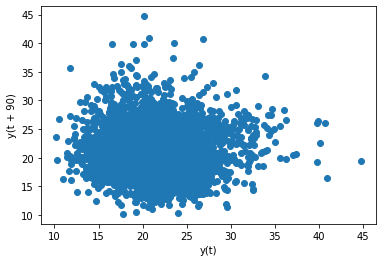

In [19]:
# plot the relationship when the time points are 90 days apart
pd.plotting.lag_plot(sydn['Temp3pm'], lag=90)

/home/yancheng/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

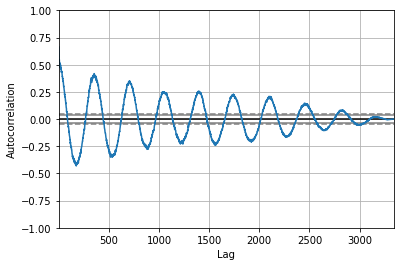

In [20]:
# Lastly we can plot the correlation between different lags in one single graph
pd.plotting.autocorrelation_plot(sydn['Temp3pm'].dropna())

#### It shows the correlation is not always positive, but return the same positive level every 300 days or so.
#### It is a sign of seasonality which we will learn more in the next episode.

### Episode 2 Coding Summary
1. Use `ts.plot()` to plot a time series ts
2. Use `ts.resample('M').mean().plot()` to plot monthly average of a time series ts
3. Use `pd.plotting.autocorrelation_plot(ts)` to plot the autocorrelation of a time series ts

## Exercise 2: 

1. Plot the 180 days moving average chart for Sydney temperature at 3 p.m.

## Answer to Exercise 2: 

<AxesSubplot:xlabel='Date'>

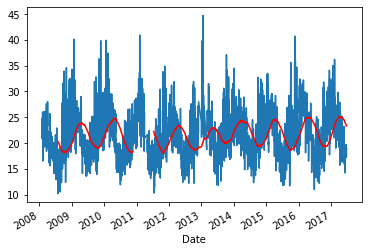

In [21]:
## Visualize the trend of rolling 90 days average
sydn['Temp3pm'].plot()
sydn['Temp3pm'].rolling(180).mean().plot(color=['red'])